In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [88]:
data = pd.read_csv('SalaryData_Train.csv')

In [89]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [91]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [92]:
data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


## View summary of dataset

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


##### We can see that there are no missing values in the dataset. I will confirm this further.

## Checking Types of variables

In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.

First of all, I will explore categorical variables.

### Explore categorical variables

In [94]:
# Find categorical variables
categorical =[ var for var in data.columns if data[var].dtype== 'O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are:\n\n',categorical)

There are 9 categorical variables

The categorical variables are:

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [95]:
data[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


.There are 9 categorical types

In [96]:
data[categorical].isna().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

We can see that there are no missing values in the categorical variables. I will confirm this further.

### frequency counts of categorical variables

In [97]:
for var in categorical:
    print(data[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [98]:
data.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [99]:
data.education.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [100]:
data.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [101]:
data.maritalstatus.value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [102]:
data[categorical].isna().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

##### We can see that there are no missing values in the categorical dataset. I will confirm this further.

### No of labels in categorical

In [103]:
for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


## Explore numerical variables

In [104]:
numerical = [var for var in data.columns  if data[var].dtype!='O']
print('There are {} Numerical Variables'.format(len(numerical)))
print('The numerical variables are:/n/n',numerical)

There are 5 Numerical Variables
The numerical variables are:/n/n ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [105]:
data[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [106]:
data[numerical].isna().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

##### We can see that all the 6 numerical variables do not contain missing values.

## datavisualizations

<Axes: >

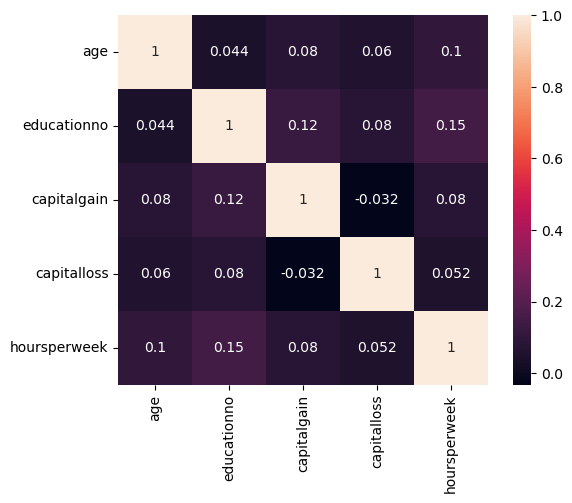

In [107]:
sns.heatmap(data[numerical].corr(),square=True,annot=True)

<Axes: >

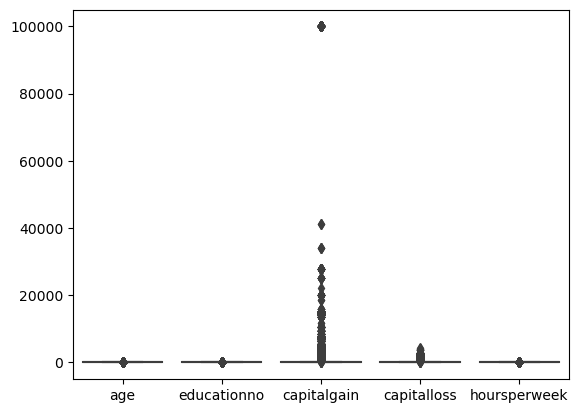

In [108]:
sns.boxplot(data[numerical])

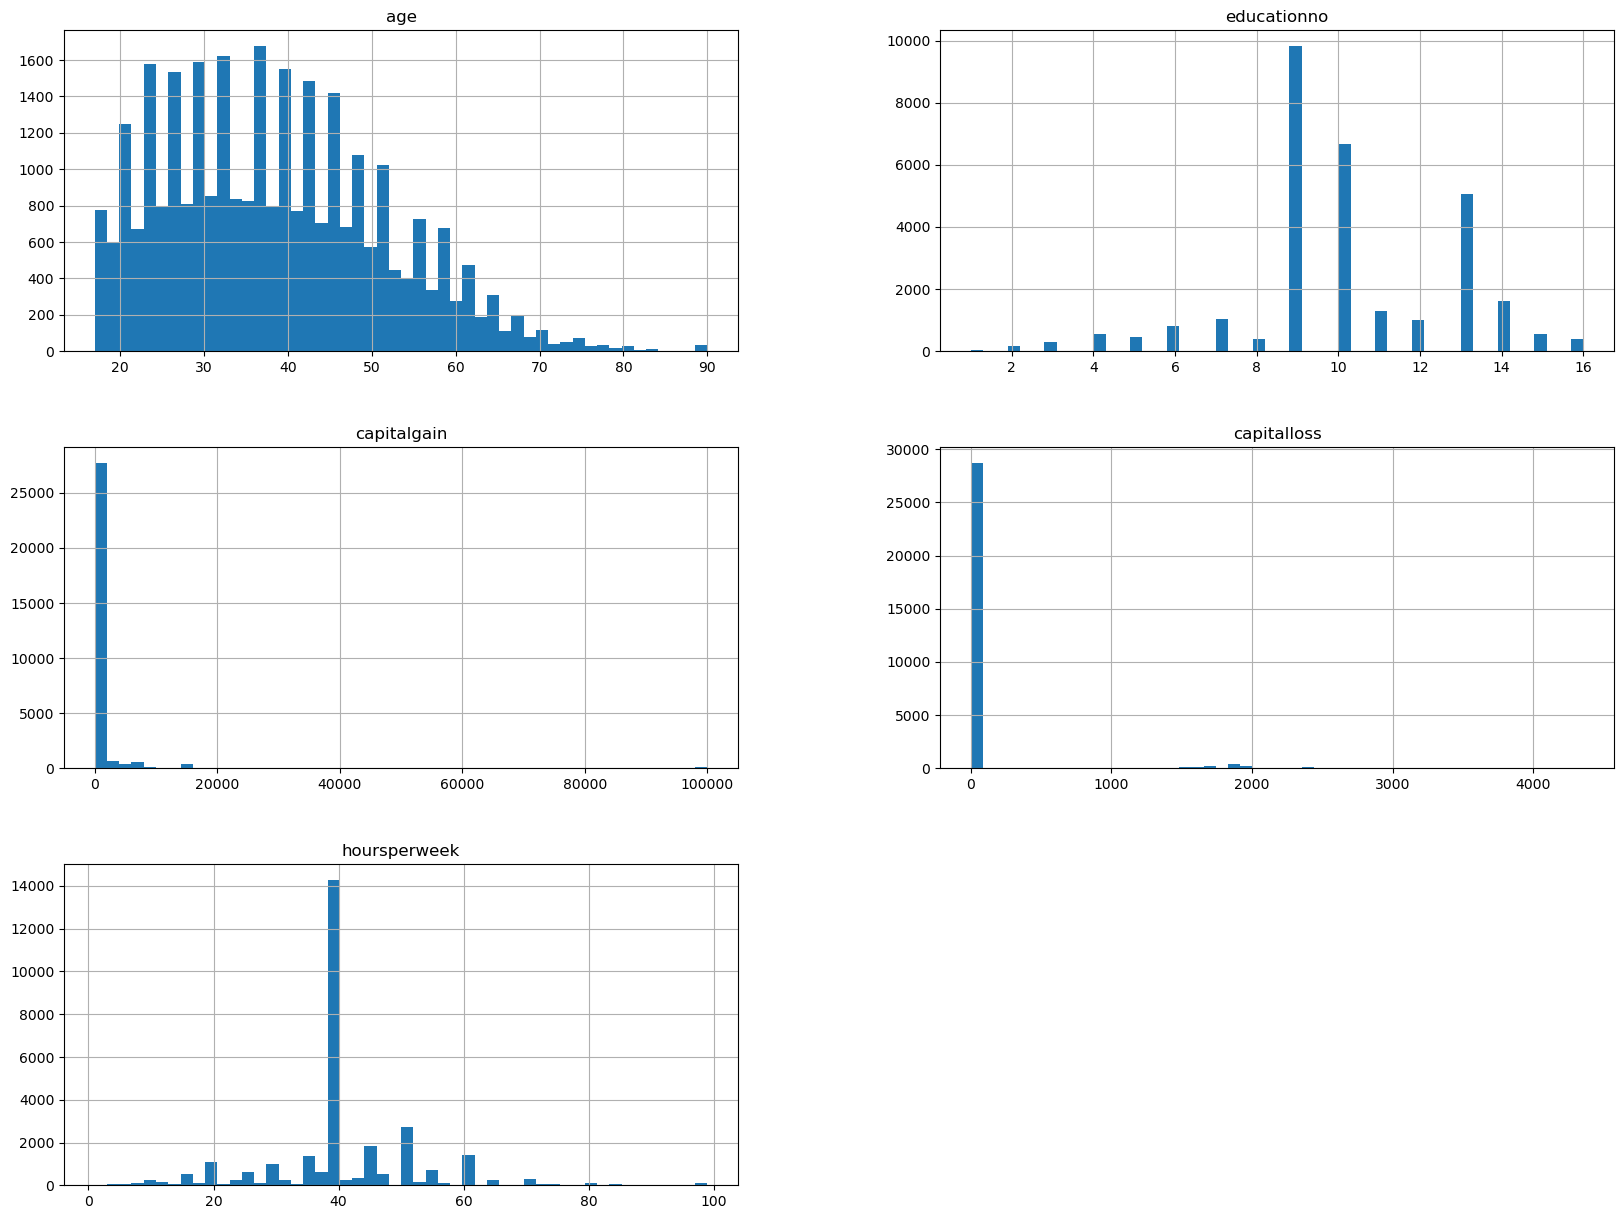

In [109]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [110]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [111]:
test_data=pd.read_csv('SalaryData_Test.csv')

In [112]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [113]:
test_data.shape

(15060, 14)

In [114]:
categorical = [var for var in test_data.columns if test_data[var].dtypes=='O']
print('the categorical {} variables\n'.format(len(categorical)))
print('These categorical variables are :\n\n',categorical)

the categorical 9 variables

These categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


## checking missing values in categorical data in testdataset

In [115]:
test_data[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

###### we can see there are no missing data in test_data

In [116]:
# view the categorical variables

test_data[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [117]:
for var in categorical:
    print(test_data[var].value_counts())

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-servic

In [118]:
for var in categorical:
    
    print(var, ' contains ', len(test_data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [119]:
# find numerical variables

numerical = [var for var in test_data.columns if test_data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [120]:
test_data[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30


In [121]:
test_data[numerical].isna().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [122]:
for var in numerical:
    print(test_data[var].value_counts())

35    444
33    442
36    431
31    423
38    420
     ... 
85      2
88      2
89      1
87      1
84      1
Name: age, Length: 73, dtype: int64
9     4943
10    3221
13    2526
14     887
11     652
7      571
12     499
6      403
4      266
15     243
5      221
8      200
16     169
3      161
2       71
1       27
Name: educationno, dtype: int64
0        13808
15024      161
7688       121
7298       111
99999       81
         ...  
2329         1
3273         1
2346         1
34095        1
2036         1
Name: capitalgain, Length: 110, dtype: int64
0       14347
1902      100
1977       84
1887       73
2415       23
        ...  
1911        1
2547        1
2603        1
2457        1
1651        1
Name: capitalloss, Length: 79, dtype: int64
40    7107
50    1376
45     849
60     680
35     592
      ... 
73       1
76       1
79       1
89       1
69       1
Name: hoursperweek, Length: 89, dtype: int64


In [153]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['workclass']= label_encoder.fit_transform(data['workclass']) 
data['education']= label_encoder.fit_transform(data['education'])
data['maritalstatus']= label_encoder.fit_transform(data['maritalstatus'])
data['occupation']= label_encoder.fit_transform(data['occupation'])
data['relationship']= label_encoder.fit_transform(data['relationship'])
data['race']= label_encoder.fit_transform(data['race'])
data['sex']= label_encoder.fit_transform(data['sex'])
data['native']= label_encoder.fit_transform(data['native'])
data['Salary']= label_encoder.fit_transform(data['Salary'])

In [154]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_data['workclass']= label_encoder.fit_transform(test_data['workclass']) 
test_data['education']= label_encoder.fit_transform(test_data['education'])
test_data['maritalstatus']= label_encoder.fit_transform(test_data['maritalstatus'])
test_data['occupation']= label_encoder.fit_transform(test_data['occupation'])
test_data['relationship']= label_encoder.fit_transform(test_data['relationship'])
test_data['race']= label_encoder.fit_transform(test_data['race'])
test_data['sex']= label_encoder.fit_transform(test_data['sex'])
test_data['native']= label_encoder.fit_transform(test_data['native'])
test_data['Salary']= label_encoder.fit_transform(test_data['Salary'])

## Declare feature vector and target variable 

In [185]:
x_train=data.iloc[:,0:13]
y_train=data.iloc[:,-1]

In [186]:
print(x_train.shape,y_train.shape)

(30161, 13) (30161,)


In [187]:
x_test = test_data.iloc[:,0:13]
y_test=test_data.iloc[:,-1]

In [188]:
print(x_test.shape,y_test.shape)

(15060, 13) (15060,)


In [189]:
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int64

In [190]:
#check the shape of X_train and X_test
x_train.shape,x_test.shape

((30161, 13), (15060, 13))

In [191]:
#check the shape of y_train and y_test
y_train.shape,y_test.shape

((30161,), (15060,))

## Feature engineering

In [192]:
x_train.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
dtype: object

## Encode Categorical variables

In [169]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [170]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [171]:
x_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4


In [172]:
x_train.shape

(30161, 13)

In [173]:
x_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37


In [174]:
x_test.shape

(15060, 13)

## Feature Scaling

In [175]:
cols = x_train.columns

In [176]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [177]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [178]:
x_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.042779,2.935947,-0.349827,1.128898,0.947877,-1.479030,-0.261233,0.385055,0.692771,0.146085,-0.218508,-0.077735,0.266358
1,0.880261,1.887645,-0.349827,1.128898,-0.387243,-0.734533,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-2.331495,0.266358
2,-0.033356,-0.208958,0.174805,-0.439733,-1.722362,-0.238202,-0.261233,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
3,1.108665,-0.208958,-2.448354,-1.224048,-0.387243,-0.238202,-0.885712,-2.010994,0.692771,-0.147447,-0.218508,-0.077735,0.266358
4,-0.794703,-0.208958,-0.349827,1.128898,-0.387243,0.754461,2.236683,-2.010994,-1.443479,-0.147447,-0.218508,-0.077735,-5.273965


In [179]:
x_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-1.023107,-0.208958,-2.448354,-1.224048,0.947877,0.009964,0.987725,-2.010994,0.692771,-0.147447,-0.218508,-0.077735,0.266358
1,-0.033356,-0.208958,0.174805,-0.439733,-0.387243,-0.486367,-0.885712,0.385055,0.692771,-0.147447,-0.218508,0.756990,0.266358
2,-0.794703,-1.257260,-0.874459,0.736740,-0.387243,1.002627,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
3,0.423453,-0.208958,1.224068,-0.047575,-0.387243,0.009964,-0.885712,-2.010994,0.692771,0.890582,-0.218508,-0.077735,0.266358
4,-0.337895,-0.208958,-2.710670,-1.616205,0.947877,0.258130,-0.261233,0.385055,0.692771,-0.147447,-0.218508,-0.912461,0.266358


## Model Training

### GaussianNB

In [193]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [194]:
ypred=gnb.predict(x_test)
ypred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [195]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Model accuracy score: {0:0.5f}'. format(accuracy_score(y_test, ypred)*100))

Model accuracy score: 79.46879


In [196]:
ypred_train=gnb.predict(x_train)
ypred_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [197]:
print('model accuracy score of trainset:{0:0.4f}'.format(accuracy_score(y_train,ypred_train)*100))

model accuracy score of trainset:79.5332


### Checking for overfitting and underfitting

In [198]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.7953
Test set score: 0.7947


###### These two values are quite comparable. So, there is no sign of overfitting.

In [199]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10759   601]
 [ 2491  1209]]

True Positives(TP) =  10759

True Negatives(TN) =  1209

False Positives(FP) =  601

False Negatives(FN) =  2491


<Axes: >

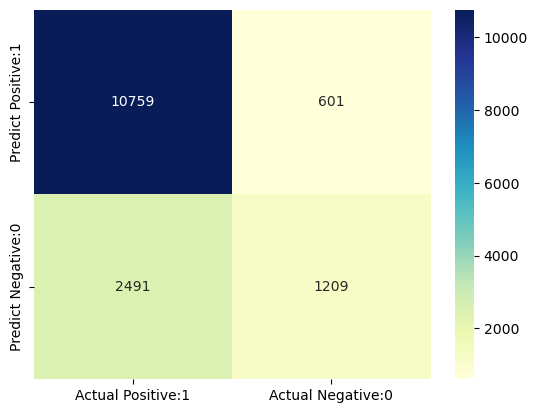

In [229]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True,fmt='d', cmap='YlGnBu')

## classification metrics

In [201]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



### Classification accuracy

In [202]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [203]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.7947


## Classification error

In [204]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.2053


## Precision

In [205]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9471


## Recall

In [206]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8120


## K fold CrossValidation

In [213]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79350348 0.79608753 0.78945623 0.79575597 0.79210875 0.80139257
 0.78481432 0.79741379 0.79575597 0.808687  ]


In [215]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()*100))

Average cross-validation score: 79.5498


In [208]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, x_train, y_train, cv=5, scoring='roc_auc').mean()*100

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 85.4015


## MultinomailNB

In [209]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import BernoulliNB


# instantiate the model
bnb = BernoulliNB()


# fit the model
bnb.fit(x_train, y_train)

BernoulliNB()

In [210]:
y_pred = bnb.predict(x_test)

In [211]:
print('model accuracyscore is:',accuracy_score(y_test,y_pred)*100)

model accuracyscore is: 72.84196547144755


In [212]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(bnb.score(x_train, y_train)*100))

print('Test set score: {:.4f}'.format(bnb.score(x_test, y_test)*100))

Training set score: 72.5573
Test set score: 72.8420


###### GaussianNB performs better than BernaulliNB

## Confusion Matrix

<Axes: >

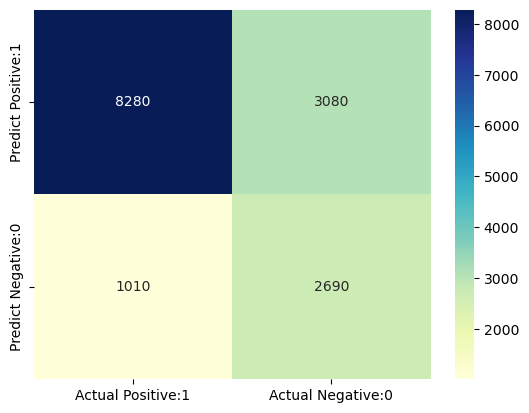

In [216]:
cm1 =confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Cross Validation

In [217]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(bnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.73450447 0.71618037 0.72579576 0.72645889 0.72612732 0.73474801
 0.71883289 0.72778515 0.72546419 0.71982759]


In [219]:
 #compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()*100))

Average cross-validation score: 72.5572


## HyperParameter Tuning

In [225]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.2, 0.8,0.7, 0.6, 0.5]
}
grid_search= GridSearchCV(bnb,param_grid=param_grid,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [0.2, 0.8, 0.7, 0.6, 0.5]})

In [226]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'alpha': 0.2}


In [227]:
 #Evaluate the model on the test set
best_nb = grid_search.best_estimator_
accuracy = best_nb.score(x_test, y_test)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.7284196547144755


# ! Thank You